# Using pretrained models (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [1]:
%%capture
!pip install datasets evaluate transformers[sentencepiece]

The Model Hub makes selecting the appropriate model simple, so that using it in any downstream library can be done in a few lines of code. Let's take a look at how to actually use one of these models, and how to contribute back to the community.

Let's say we're looking for a French-based model that can perform mask filling.

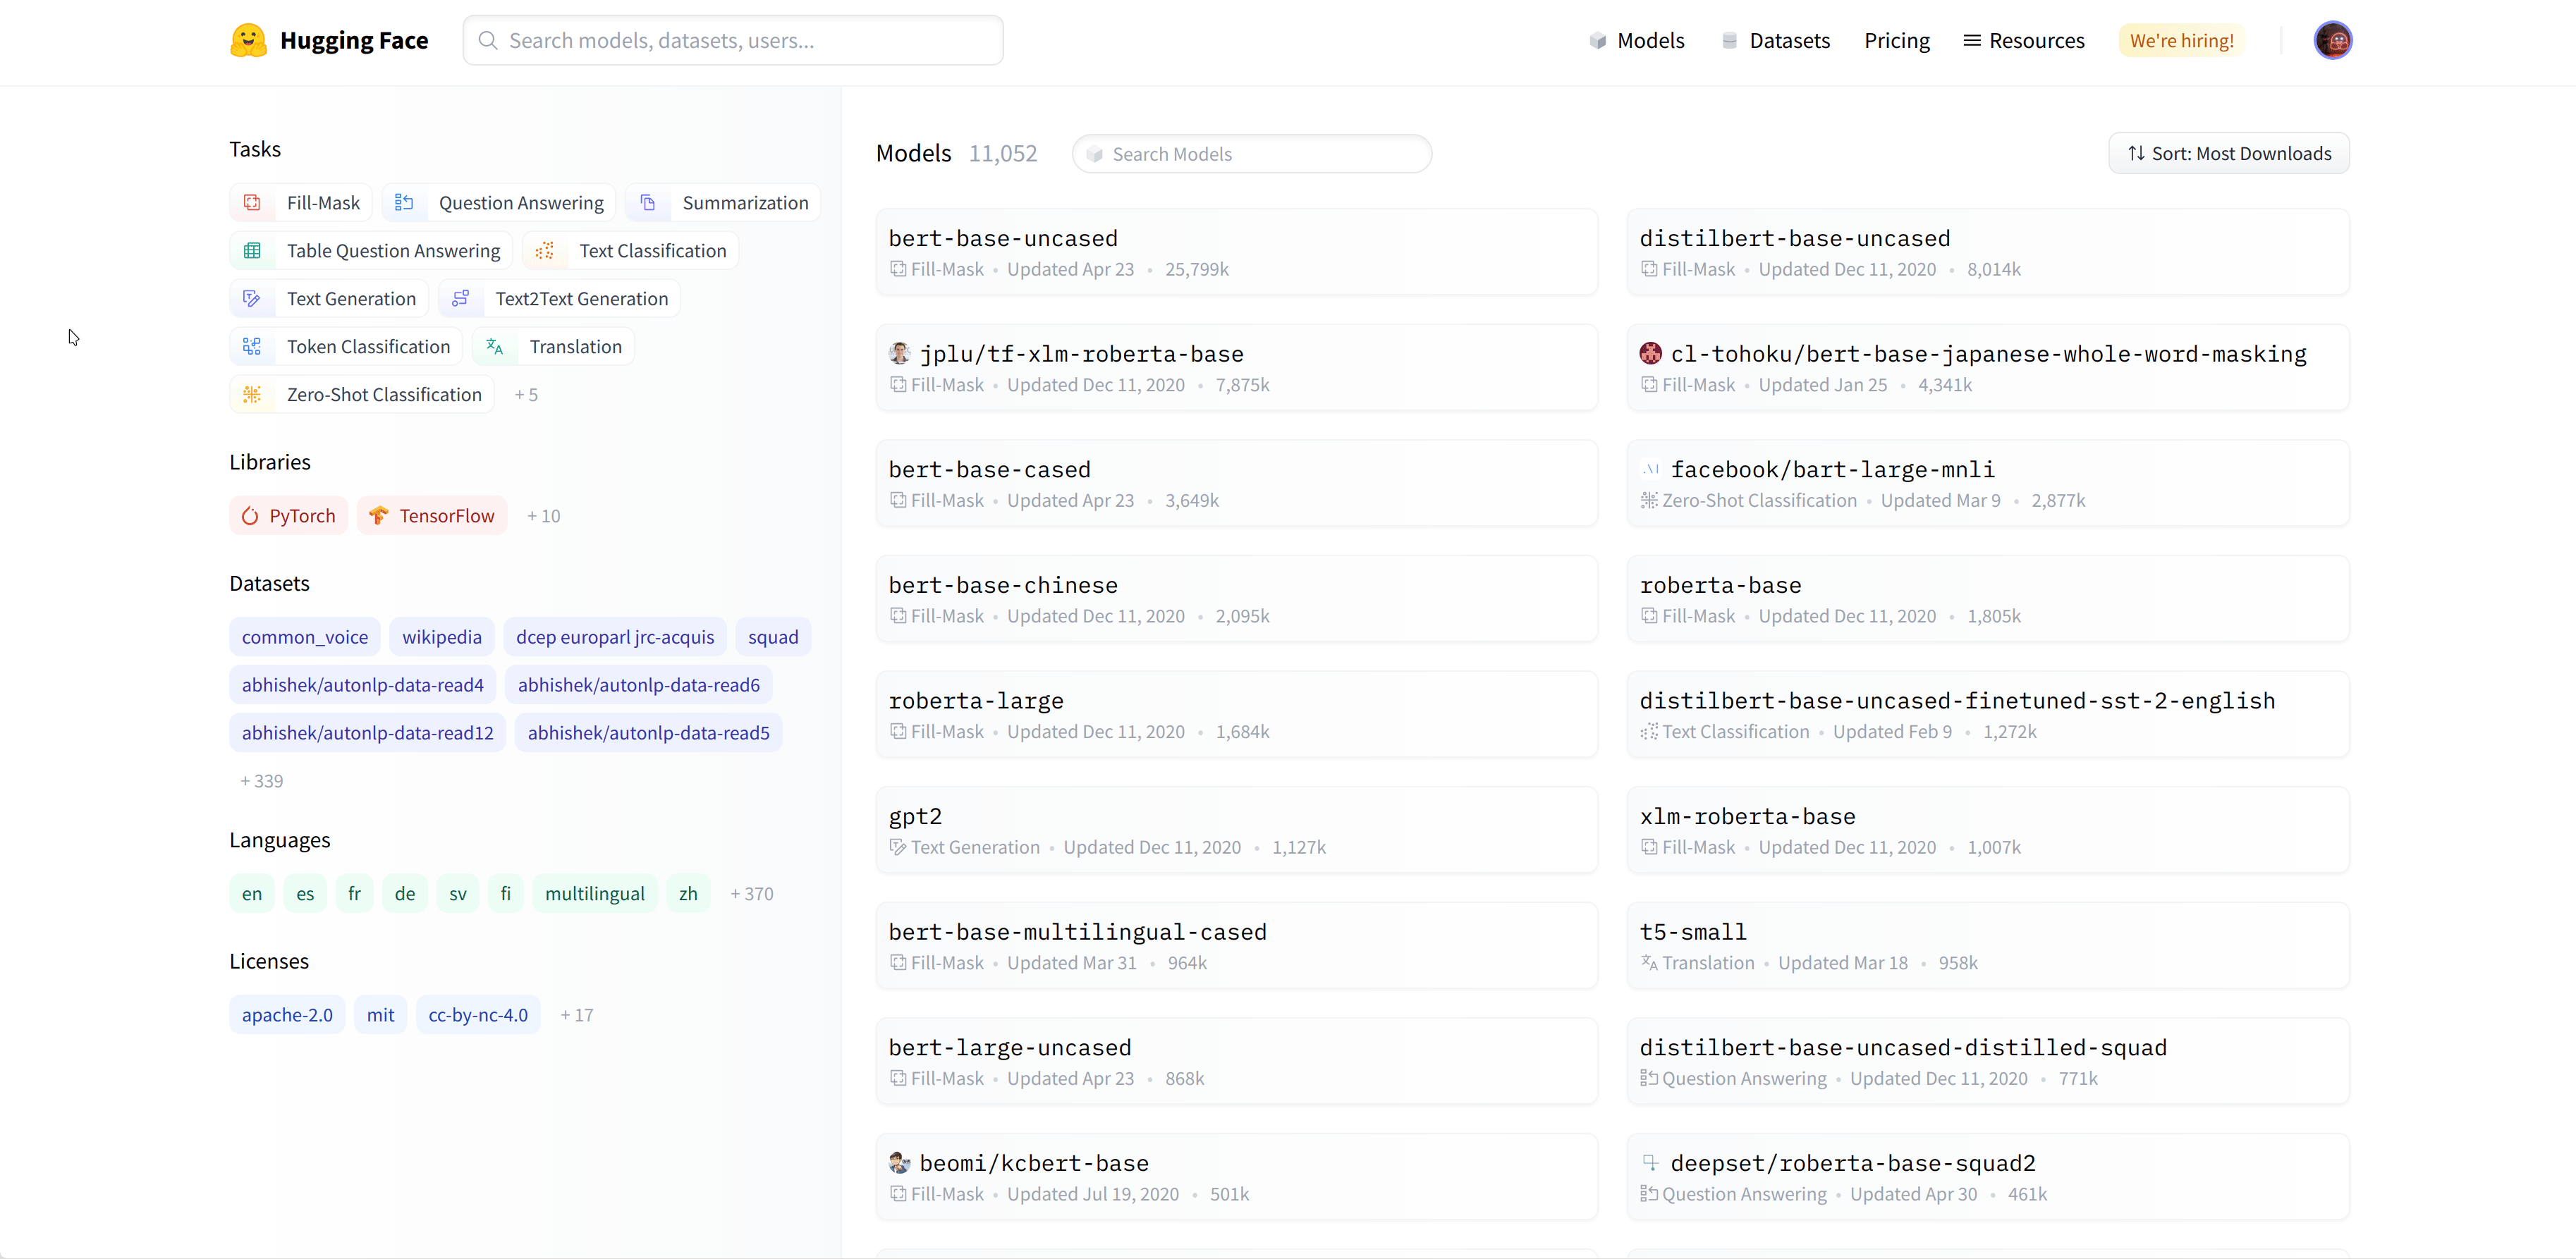

We select the `camembert-base` checkpoint to try it out. The identifier `camembert-base` is all we need to start using it! As you've seen in previous chapters, we can instantiate it using the `pipeline()` function:

In [2]:
from transformers import pipeline

camembert_fill_mask = pipeline("fill-mask", model="camembert-base")
results = camembert_fill_mask("Le camembert est <mask> :)")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

In [4]:
for result in results:
    print(result)

{'score': 0.490911602973938, 'token': 7200, 'token_str': 'délicieux', 'sequence': 'Le camembert est délicieux :)'}
{'score': 0.10556967556476593, 'token': 2183, 'token_str': 'excellent', 'sequence': 'Le camembert est excellent :)'}
{'score': 0.034533143043518066, 'token': 26202, 'token_str': 'succulent', 'sequence': 'Le camembert est succulent :)'}
{'score': 0.03303126245737076, 'token': 528, 'token_str': 'meilleur', 'sequence': 'Le camembert est meilleur :)'}
{'score': 0.030076367780566216, 'token': 1654, 'token_str': 'parfait', 'sequence': 'Le camembert est parfait :)'}


As you can see, loading a model within a pipeline is extremely simple. The only thing you need to watch out for is that the chosen checkpoint is suitable for the task it's going to be used for. For example, here we are loading the `camembert-base` checkpoint in the `fill-mask` pipeline, which is completely fine. But if we were to load this **checkpoint in the text-classification pipeline, the results would not make any sense** because the head of `camembert-base` is not suitable for this task! We recommend using the task selector in the Hugging Face Hub interface in order to select the appropriate checkpoints:

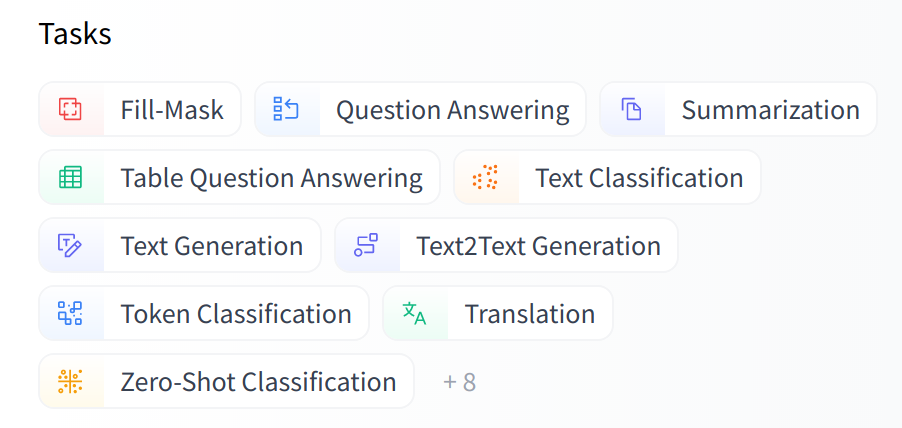

You can also instantiate the checkpoint using the model architecture directly:

In [5]:
from transformers import CamembertTokenizer, CamembertForMaskedLM

tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
model = CamembertForMaskedLM.from_pretrained("camembert-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


However, we recommend using the [Auto* classes](https://huggingface.co/transformers/model_doc/auto?highlight=auto#auto-classes) instead, as these are by design `architecture-agnostic`. While the previous code sample limits users to checkpoints loadable in the CamemBERT architecture, using the Auto* classes makes switching checkpoints simple:

In [6]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("camembert-base")
model = AutoModelForMaskedLM.from_pretrained("camembert-base")

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing CamembertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


When using a pretrained model, make sure to check how it was trained, on which datasets, its limits, and its biases. All of this information should be indicated on its model card.